# Step 1: Read Grace timeseries data

<IPython.core.display.Javascript object>


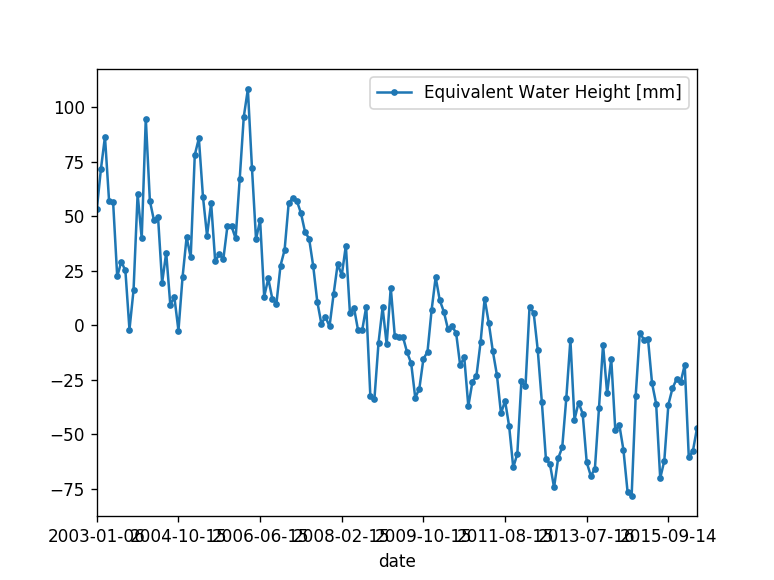

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

grace_basin_csv=r"D:\FAO\WA_Sheet1\Main\Jordan\data\GRACE\Jordan_v190402.csv"
# grace_basin_csv=r"D:\FAO\Jordan\WA_data\GRACE\Yarmouk_v190401.csv"
# grace_basin_csv=r"D:\FAO\Jordan\WA_data\GRACE\Zarqa_v190401.csv"

ts_grace=pd.read_csv(grace_basin_csv,sep=',',index_col=0)
ts_grace.plot(style='.-')

# Step 2: Interpolate to daily data

<IPython.core.display.Javascript object>


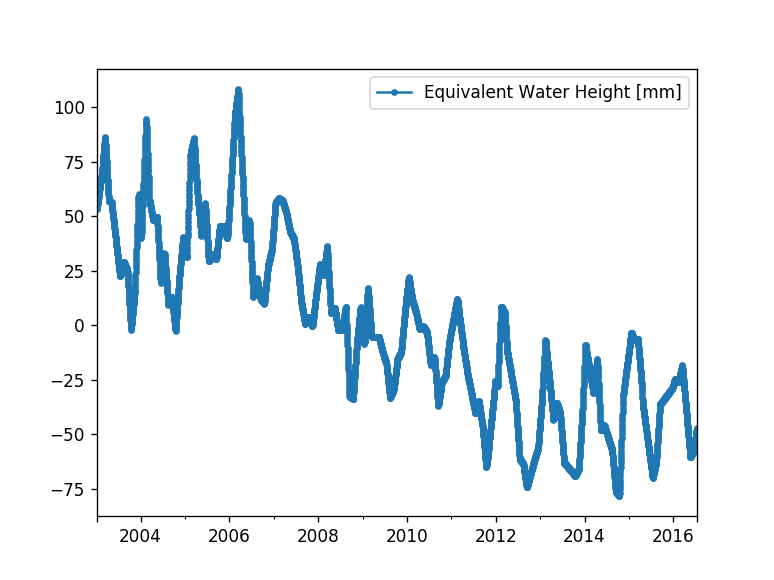

In [13]:
ts_day=pd.DataFrame(index=pd.date_range(start='2003-01-06',end='2016-07-14',freq='D'))
ts_grace_daily=pd.merge(ts_day,ts_grace, left_index=True,right_index=True, how='outer')
ts_grace_interpolate_daily=ts_grace_daily.interpolate()
ts_grace_interpolate_daily.plot(style='.-')

# Step 3: Calculate cumulative sum of dS

<IPython.core.display.Javascript object>


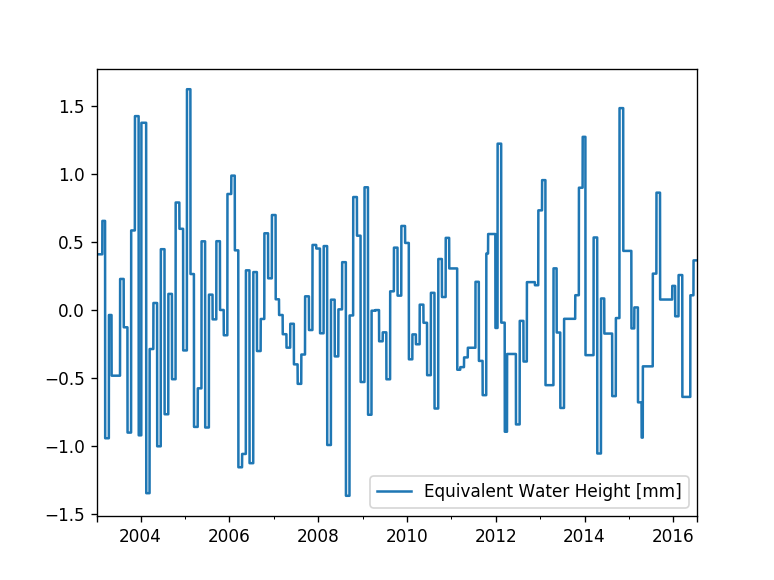

In [14]:
ts_dS_daily=ts_grace_interpolate_daily.diff()
ts_dS_daily.plot()

<IPython.core.display.Javascript object>


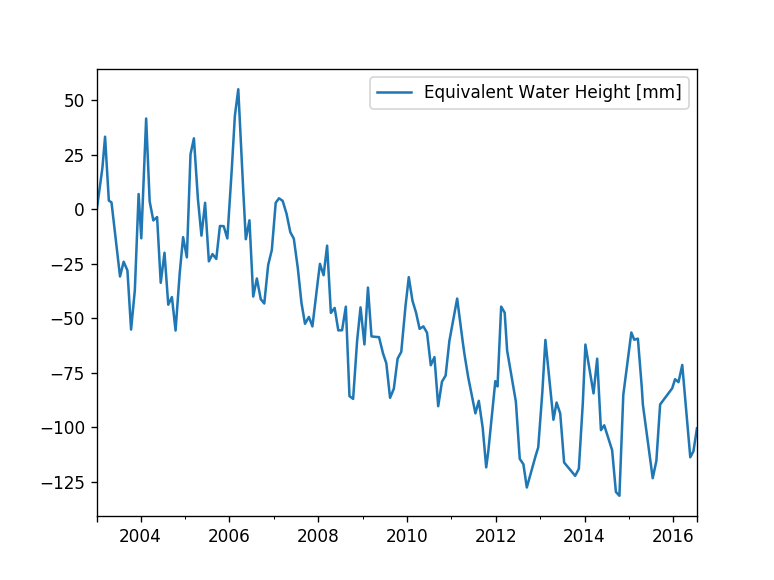

In [15]:
ts_cumsum_dS_daily=ts_dS_daily.cumsum()
ts_cumsum_dS_daily.plot()

In [16]:
ts_cumsum_dS_daily

,Equivalent Water Height [mm]
2003-01-06,NaN
2003-01-07,0.407205
2003-01-08,0.814409
2003-01-09,1.221614
2003-01-10,1.628819
2003-01-11,2.036024
2003-01-12,2.443228
2003-01-13,2.850433
2003-01-14,3.257638
2003-01-15,3.664842


# Step 4: Calculate monthly dS by second order central difference between cumsum dS

$$\Delta T\overline WS _m ={TWSA _{m+1} - TWSA _{m-1}\over 2}$$

In [17]:
ts_cumsum_dS_monthly_firstday=ts_cumsum_dS_daily.resample('MS').first()
ts_cumsum_dS_monthly_firstday #take value of 1st day of every month

,Equivalent Water Height [mm]
2003-01-01,0.407205
2003-02-01,10.587322
2003-03-01,24.199599
2003-04-01,17.267146
2003-05-01,3.404382
2003-06-01,-8.964467
2003-07-01,-23.524915
2003-08-01,-27.189851
2003-09-01,-26.229346
2003-10-01,-42.504182


In [18]:
ts_dS_monthly=ts_cumsum_dS_monthly_firstday.diff(2).shift(-1)/2
ts_dS_monthly

,Equivalent Water Height [mm]
2003-01-01,NaN
2003-02-01,11.896197
2003-03-01,3.339912
2003-04-01,-10.397609
2003-05-01,-13.115806
2003-06-01,-13.464648
2003-07-01,-9.112692
2003-08-01,-1.352215
2003-09-01,-7.657165
2003-10-01,-9.511505


# Step 5: Calculate yearly dS

<IPython.core.display.Javascript object>


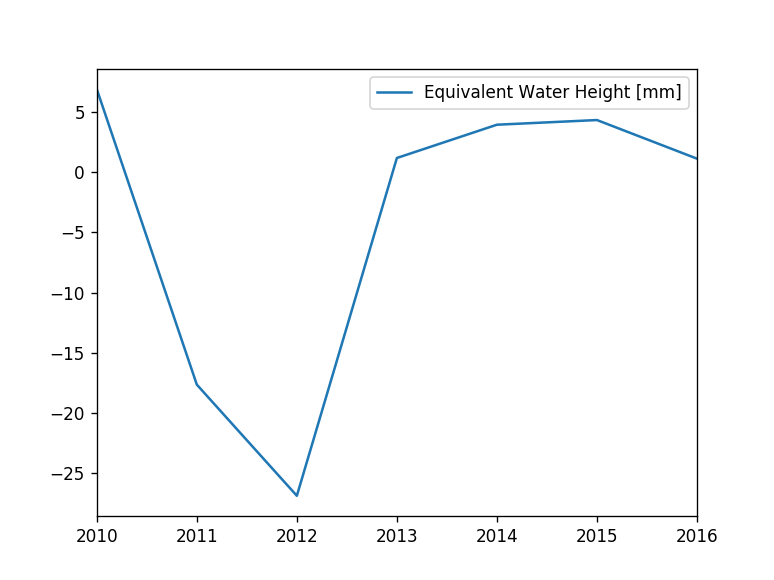

In [19]:
ts_dS_yearly=ts_dS_monthly.resample('A-AUG').sum()
#difference between first day of this year and first day of previous year 
#is the change of this year
ts_dS_yearly[7:].plot()

In [20]:
ts_dS_yearly.index=ts_dS_yearly.index.year
ts_dS_yearly

,Equivalent Water Height [mm]
2003,-32.206862
2004,-10.340662
2005,15.132497
2006,-14.327575
2007,-5.024577
2008,-16.933989
2009,-23.529303
2010,6.882722
2011,-17.646220
2012,-26.875169


In [21]:
ts_dS_yearly[6:-1].to_csv(r'D:\FAO\WA_Sheet1\Main\Jordan\data\GRACE\dS_y_cmi.csv',sep=';')